# 0.0 Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 0.1 Data Load

In [2]:
df_raw_bureau = pd.read_csv('../../projeto/data_raw/bureau.csv')
df_raw_bureau_balance = pd.read_csv('../../projeto/data_raw/bureau_balance.csv')

In [3]:
df_train = pd.read_csv('../../projeto/data_raw/application_train.csv')

In [4]:
df_description = pd.read_csv('../../projeto/data_raw/HomeCredit_columns_description.csv', encoding='latin1', index_col = 0)

# 1.0 Data Description

In [5]:
df1_bureau = df_raw_bureau.copy()
df1_bureau_balance = df_raw_bureau_balance.copy()

In [6]:
df1_bureau.head().T

,0,1,2,3,4
SK_ID_CURR,215354,215354,215354,215354,215354
SK_ID_BUREAU,5714462,5714463,5714464,5714465,5714466
CREDIT_ACTIVE,Closed,Active,Active,Active,Active
CREDIT_CURRENCY,currency 1,currency 1,currency 1,currency 1,currency 1
DAYS_CREDIT,-497,-208,-203,-203,-629
CREDIT_DAY_OVERDUE,0,0,0,0,0
DAYS_CREDIT_ENDDATE,-153.0,1075.0,528.0,NaN,1197.0
DAYS_ENDDATE_FACT,-153.0,NaN,NaN,NaN,NaN
AMT_CREDIT_MAX_OVERDUE,NaN,NaN,NaN,NaN,77674.5
CNT_CREDIT_PROLONG,0,0,0,0,0


In [7]:
df1_bureau_balance.head().T

,0,1,2,3,4
SK_ID_BUREAU,5715448,5715448,5715448,5715448,5715448
MONTHS_BALANCE,0,-1,-2,-3,-4
STATUS,C,C,C,C,C


## 1.1 Feature description

In [8]:
pd.set_option('display.max_colwidth', None)
df_description.loc[ df_description['Table'] == 'bureau.csv' ].reset_index(drop = 1).head(50)

,Table,Row,Description,Special
0,bureau.csv,SK_ID_CURR,"ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau",hashed
1,bureau.csv,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application),hashed
2,bureau.csv,CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits,NaN
3,bureau.csv,CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit,recoded
4,bureau.csv,DAYS_CREDIT,How many days before current application did client apply for Credit Bureau credit,time only relative to the application
5,bureau.csv,CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the time of application for related loan in our sample,NaN
6,bureau.csv,DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at the time of application in Home Credit,time only relative to the application
7,bureau.csv,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of application in Home Credit (only for closed credit),time only relative to the application
8,bureau.csv,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample),NaN
9,bureau.csv,CNT_CREDIT_PROLONG,How many times was the Credit Bureau credit prolonged,NaN


In [9]:
df_description.loc[ df_description['Table'] == 'bureau_balance.csv' ].reset_index(drop = 1).head(50)

,Table,Row,Description,Special
0,bureau_balance.csv,SK_BUREAU_ID,Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table,hashed
1,bureau_balance.csv,MONTHS_BALANCE,Month of balance relative to application date (-1 means the freshest balance date),time only relative to the application
2,bureau_balance.csv,STATUS,"Status of Credit Bureau loan during the month (active, closed, DPD0-30, [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60, 5 means DPD 120+ or sold or written off ] )",NaN


## 1.2 Data shape

In [10]:
df1_bureau.shape

(1716428, 17)

In [11]:
df1_bureau_balance.shape

(27299925, 3)

## 1.3 Check NaN

In [12]:
df1_bureau.isna().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [13]:
df1_bureau_balance.isna().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

## 1.4 Describe

In [14]:
df1_bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


# 2.0 Feature Engineering

In [15]:
df2_bureau = df1_bureau.copy()
df2_bureau_balance = df1_bureau_balance.copy()

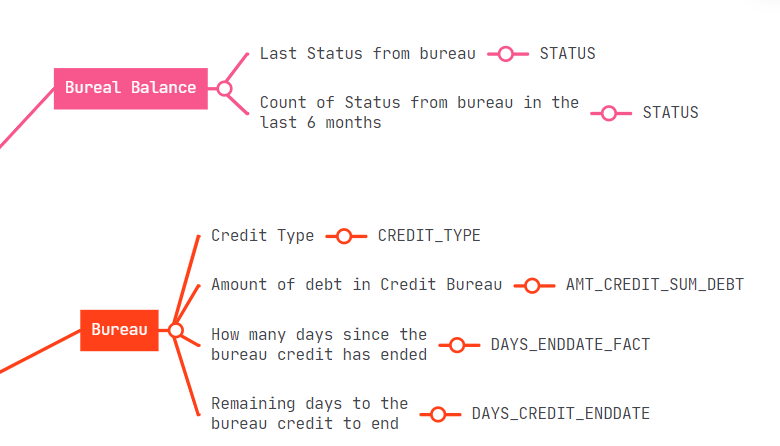

The features and EDA of bureau will be developed taking into consideration the business assumptions

In [16]:
df2_bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [17]:
df2_bureau_balance.columns

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [18]:
df2_bureau_balance['STATUS'].unique()

array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

In [19]:
def bureau_balance_feature_engineering(df_cleaned):

    df_featured = df_cleaned.copy()

    df_featured = df_featured.sort_values(['SK_ID_BUREAU','MONTHS_BALANCE'], ascending = [True,False])

    df_featured['STATUS_DPD_60_B'] = df_featured['STATUS'].apply(lambda x: 1 if x in ['3','4','5'] else 0) 
     
    df_featured = df_featured.groupby(['SK_ID_BUREAU']).agg(LAST_STATUS_DPD_60_B = ('STATUS_DPD_60_B','max'),
                                                            LAST_STATUS_B = ('STATUS','last')
                                                                         ).reset_index()

 
    return df_featured


In [20]:
def bureau_feature_engineering(df_bureau, df_featured_bureau_balance):

    df_merged = pd.merge(df_bureau, df_featured_bureau_balance, how = 'left', on = 'SK_ID_BUREAU')

    # Count of credit types
    df_featured = df_merged.groupby(['SK_ID_CURR']).agg(
                                                          CREDIT_TYPE_COUNT_B = ('CREDIT_TYPE','count'),
                                                          LAST_CREDIT_TYPE_B = ('CREDIT_TYPE','last'),
                                                          DAYS_SINCE_ENDED_B = ('DAYS_ENDDATE_FACT','last'),
                                                          DAYS_TO_END_B = ('DAYS_CREDIT_ENDDATE','last'),
                                                          LAST_STATUS_DPD_60_B = ('LAST_STATUS_DPD_60_B','max'),
                                                          LAST_STATUS_B = ('LAST_STATUS_B','last')
                                                          ).reset_index()
    
    return df_featured


In [21]:
def join_train_installments(df_train, df_installments):

    df_train = df_train[['SK_ID_CURR','TARGET']]

    df_merged = df_train.merge(df_installments, on = 'SK_ID_CURR', how = 'left', validate = 'one_to_one')

    return df_merged

In [22]:
def feature_analysis(df_final):

    df_analysis = df_final.copy()

    for col in df_analysis.select_dtypes('number').columns:
        if col not in ['SK_ID_CURR','TARGET']:	
            col_name = f'{col}_q'
            df_analysis[col_name] = pd.qcut(df_analysis[col], q = 4, duplicates='drop',labels=False)
            df_analysis.groupby(col_name)['TARGET'].mean().plot()
            plt.axhline(df_analysis['TARGET'].mean(), color = 'red', linestyle = '--')
            plt.ylim(bottom =0)
            plt.title(col)
            plt.show()


In [23]:
df_featured_bureau_balance = bureau_balance_feature_engineering(df2_bureau_balance)

In [24]:
df_featured_bureau = bureau_feature_engineering(df2_bureau, df_featured_bureau_balance)

In [25]:
df_featured_bureau_balance.shape

(817395, 3)

In [26]:
df_featured_bureau.shape

(305811, 7)

In [27]:
df_final = join_train_installments(df_train, df_featured_bureau)

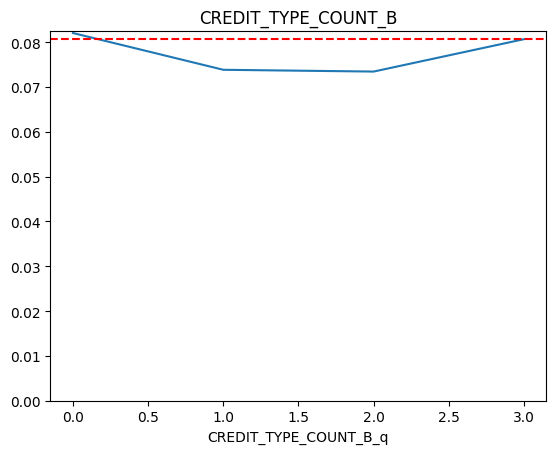

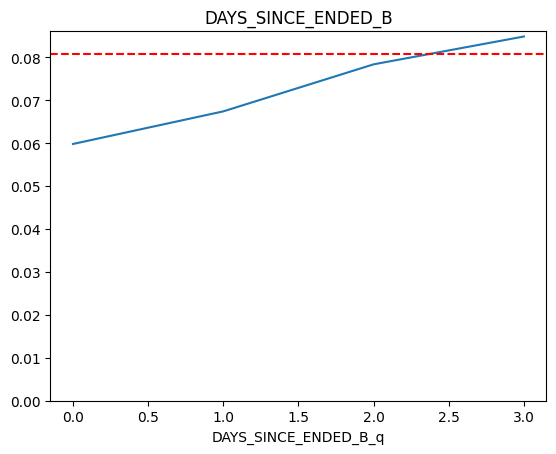

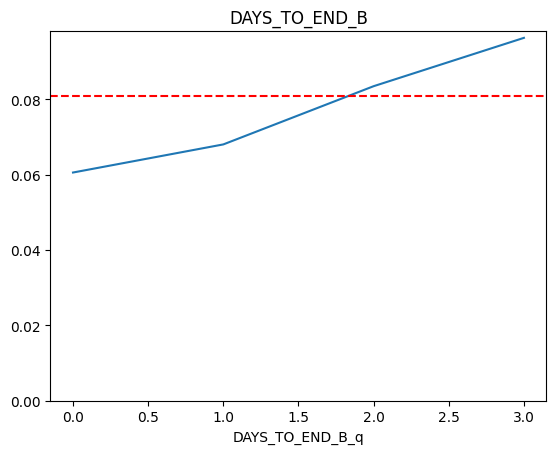

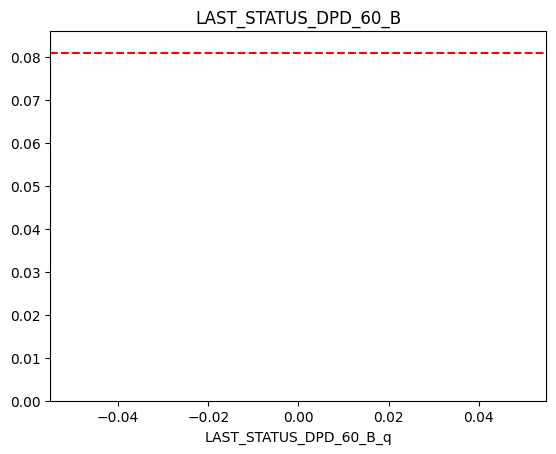

In [28]:
feature_analysis(df_final)

In [29]:
df_featured_bureau.to_parquet('../../projeto/data_featured/bureau.parquet')